# Digital Signal Processing Take-home Assignment
### **Name:** Shaganjaly Sivanenthiran  
### **Index No:** 23001895  

## Part 1: Convolution (Input Side Algorithm)

### Objective
Convolution is the process of combining two signals to form a third signal.  
In the input-side convolution algorithm, each input sample is replaced by a scaled version of the impulse response and accumulated into the output signal.

### Tasks
1. Generate a noisy 50 Hz sine wave sampled at 1000 Hz for 1 second  
2. Define a 3-point Moving Average Filter impulse response  
3. Implement manual convolution using nested loops  
4. Plot and compare the original and filtered signals

In [24]:
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Generate a Noisy Input Signal

A 50 Hz sine wave is generated and sampled at 1000 Hz for 1 second.  
White Gaussian noise is added to simulate real-world signal corruption.

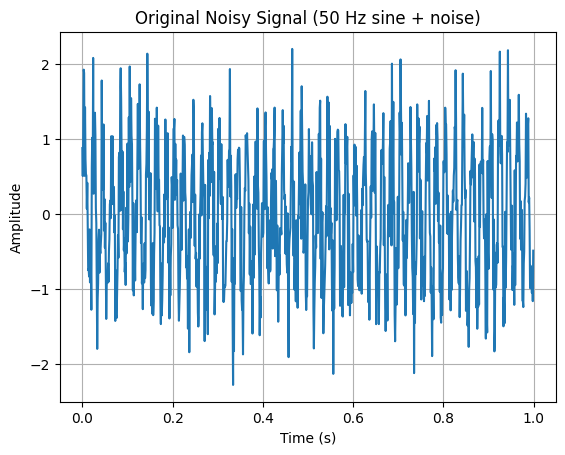

In [34]:
# Signal parameters
fs = 1000        # sampling frequency (Hz)
duration = 1.0   # seconds
f0 = 50          # sine frequency (Hz)

# Time vector
N = int(fs * duration)
t = np.arange(N) / fs

# Generate noisy sine wave
np.random.seed(0)
noise_amp = 0.5
x = np.sin(2*np.pi*f0*t) + noise_amp*np.random.randn(N)

# Plot original signal
plt.figure()
plt.plot(t, x)
plt.title("Original Noisy Signal (50 Hz sine + noise)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

### Step 2: Define Impulse Response

A 3-point Moving Average Filter smooths the signal by averaging three consecutive samples.

\[
h = \left[\frac{1}{3}, \frac{1}{3}, \frac{1}{3}\right]
\]

In [35]:
h = np.array([1/3, 1/3, 1/3])
print("Impulse response:", h)

Impulse response: [0.33333333 0.33333333 0.33333333]


### Step 3: Manual Convolution (Input Side Algorithm)

The convolution is implemented using nested loops.

For each input sample:
- Multiply the sample by each impulse response coefficient
- Accumulate the results into the output signal

Output length:
\[
N_{out} = N_x + N_h - 1
\]

In [36]:
def manual_convolution(x, h):
    Nx = len(x)
    Nh = len(h)

    # Output signal
    y = np.zeros(Nx + Nh - 1)

    # Input-side convolution
    for i in range(Nx):
        for m in range(Nh):
            y[i + m] += x[i] * h[m]

    return y

# Apply convolution
y = manual_convolution(x, h)

# Output time axis
t_y = np.arange(len(y)) / fs

### Step 4: Compare Original and Filtered Signals

The filtered signal is expected to be smoother because the moving average filter reduces high-frequency noise.

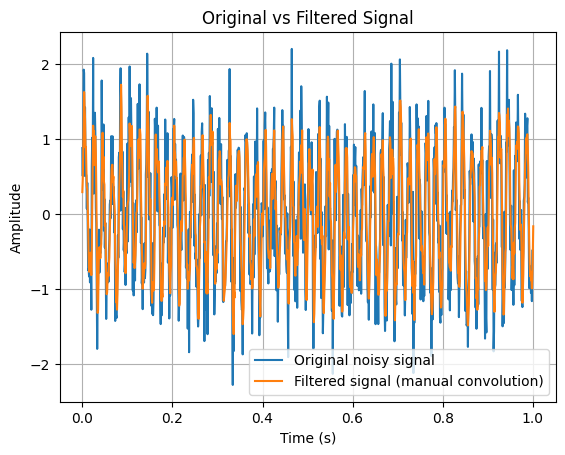

In [37]:
plt.figure()
plt.plot(t, x, label="Original noisy signal")
plt.plot(t_y, y, label="Filtered signal (manual convolution)")
plt.title("Original vs Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

## Part 2: Discrete Fourier Transform (DFT)

### Objective
The Discrete Fourier Transform (DFT) converts a discrete-time signal into its frequency spectrum.  
Although the FFT is commonly used for speed, this assignment implements the DFT directly using the correlation equations.

### Tasks
1. Create a signal consisting of two sine waves (60 Hz and 120 Hz) plus white noise  
2. Implement `calculate_dft(x)` to compute the Real and Imaginary parts  
3. Compute the magnitude spectrum  
4. Plot **Frequency (Hz)** vs **Amplitude** with proper labels, title, and grid

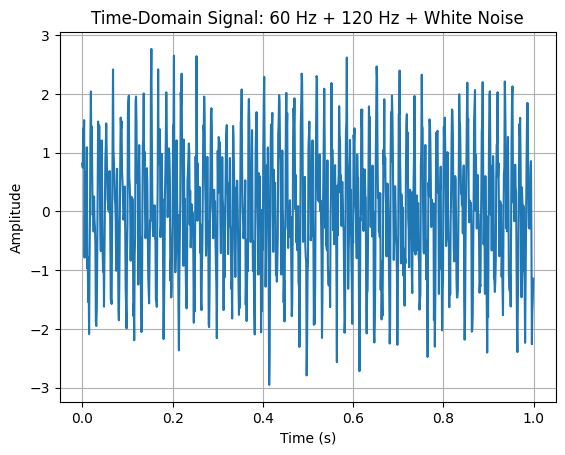

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
fs = 1000        # sampling frequency (Hz)
duration = 1.0   # seconds
N = int(fs * duration)
t = np.arange(N) / fs

# Frequencies
f1 = 60
f2 = 120

# Generate noisy two-tone signal
np.random.seed(1)
noise_amp = 0.5
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + noise_amp*np.random.randn(N)

# Plot time-domain signal
plt.figure()
plt.plot(t, x)
plt.title("Time-Domain Signal: 60 Hz + 120 Hz + White Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

### Manual DFT (Correlation Method)

For a signal \(x[i]\) of length \(N\), the DFT components are:

\[
ReX[k] = \sum_{i=0}^{N-1} x[i]\cos\left(\frac{2\pi k i}{N}\right)
\]

\[
ImX[k] = -\sum_{i=0}^{N-1} x[i]\sin\left(\frac{2\pi k i}{N}\right)
\]

Magnitude spectrum:

\[
MagX[k] = \sqrt{(ReX[k])^2 + (ImX[k])^2}
\]

In [39]:
def calculate_dft(x):
    """
    Manual DFT using the given correlation equations.
    Returns: ReX, ImX, MagX
    """
    x = np.asarray(x, dtype=float)
    N = len(x)

    ReX = np.zeros(N)
    ImX = np.zeros(N)

    for k in range(N):
        re_sum = 0.0
        im_sum = 0.0
        for i in range(N):
            angle = 2 * np.pi * k * i / N
            re_sum += x[i] * np.cos(angle)
            im_sum -= x[i] * np.sin(angle)   # minus sign as required
        ReX[k] = re_sum
        ImX[k] = im_sum

    MagX = np.sqrt(ReX**2 + ImX**2)
    return ReX, ImX, MagX

ReX, ImX, MagX = calculate_dft(x)
print("DFT calculated. N =", len(MagX))

DFT calculated. N = 1000


### Plot the Magnitude Spectrum

The frequency for bin \(k\) is:

\[
f[k] = \frac{k f_s}{N}
\]

Since the signal is real-valued, we plot only the first half of the spectrum (0 to Nyquist frequency, \(f_s/2\)).

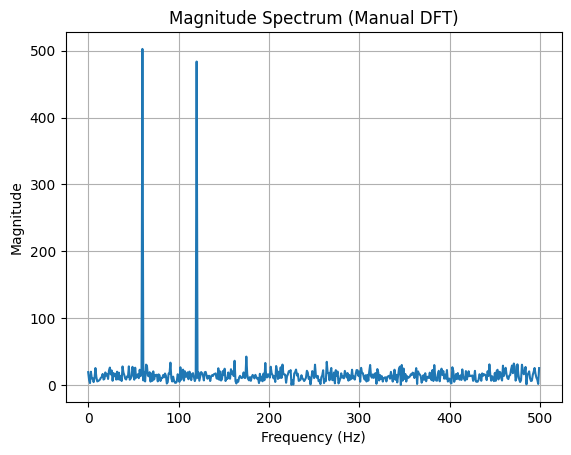

In [41]:
# Frequency axis
f = np.arange(N) * fs / N

# Plot only up to Nyquist
half = N // 2

plt.figure()
plt.plot(f[:half], MagX[:half])
plt.title("Magnitude Spectrum (Manual DFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()